<a href="https://colab.research.google.com/github/gustacoutinho/DataAnalysis-EnergyAndPIB/blob/main/Pergunta_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4: Qual fonte de energia teve maior aumento na sua geração (terawatt-hours) baseada no crescimento do PIB?

In [89]:
!pip install xlrd==1.2.0
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive/


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [91]:
sns.set(rc={'figure.figsize':(20,10)})

In [92]:
countrys = ['Brazil']
time_period = ['Country Name']
for i in range(2010,2021):
  time_period += [str(i)]

print(time_period)

['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [93]:
def filtraCountrysdf(df, countrys):
  return df[df['country'].isin(countrys)]

#Função para filtrar o Data set pelo país desejado

def filtraCountrydf(df, country):
  df_mask = df['country'] == country
  return df[df_mask]

#Função de tratamento da energia primaria do dataset para corresponder com a pergunta
def alteraEstruturadf(df):
  filtered_pib = pd.DataFrame()
  for index, row in df.iterrows():
      for i in range(2010, 2021):
        filtered_pib.loc[i,'PIB'] = row[str(i)]
        filtered_pib.loc[i,'country'] = row['country']

  filtered_pib['PIB'] = filtered_pib['PIB'].str.replace('.','')
  filtered_pib['PIB'] = filtered_pib['PIB'].astype({"PIB": int})
  return filtered_pib

#VERIFICAR
def geraNovoDF(df):
  df_novo = pd.DataFrame()
  for x in range(len(countrys)): 
    df_filtrado = pd.DataFrame()
    c = countrys[x]
    df_filtrado = filtraCountrydf(df, c)
    df_temp = alteraEstruturadf(df_filtrado)
    if df_novo.empty:
      df_novo = df_temp
      df_novo.reset_index()
    else:
      df_novo = pd.concat([df_novo, df_temp])

  return df_novo

#Leitura csv e selecionamento de dados e realizar a chamada das funções criadas para tratamento dos dados
df_pib = pd.read_csv("drive/MyDrive/Trab/pib.csv", sep=";")
df_pib = df_pib[['Country Name', '2010', '2011', '2012', '2013', '2014', '2015',
                  '2016', '2017', '2018', '2019', '2020']]
df_pib.rename(columns = {'Country Name':'country' }, inplace = True)
df_pib = filtraCountrysdf(df_pib, countrys)
df_pib_final = geraNovoDF(df_pib)
df_pib_final = df_pib_final.reset_index()
df_pib_final.rename(columns = {'index':'year' }, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [94]:
#Leitura csv e selecionamento de dados e realizar a chamada das funções criadas para tratamento dos dados
df_energy = pd.read_csv("drive/MyDrive/Trab/energy.csv", sep=';')
df_energy = df_energy[['year', 'oil_electricity','hydro_electricity','solar_electricity','fossil_electricity','gas_electricity','country']]
df_energy = df_energy.drop(df_energy[df_energy.year < 2010].index)
df_energy = df_energy.drop(df_energy[df_energy.year > 2020].index)
df = df_energy[df_energy.country == 'Brazil']
df.index = pd.RangeIndex(len(df))
df_energy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,8,9,12,13,16,17,20,22,32,33,34,35,38,54,56,66,72,74,80,84,89,91,95,96,97,100,103,109,118,119,120,122,125,126,127) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,country
110,2010,0.19,0.75,0.00,0.19,0.0,Afghanistan
111,2011,0.18,0.6,0.00,0.18,0.0,Afghanistan
112,2012,0.14,0.71,0.03,0.14,0.0,Afghanistan
113,2013,0.22,0.86,0.03,0.22,0.0,Afghanistan
114,2014,0.16,0.97,0.03,0.16,0.0,Afghanistan
...,...,...,...,...,...,...,...
17234,2016,0.04,2.95,0.01,3.5,0.0,Zimbabwe
17235,2017,0.03,3.93,0.01,03.05,0.0,Zimbabwe
17236,2018,0.04,5.0,0.01,3.73,0.0,Zimbabwe
17237,2019,0.04,7.26,0.01,3.66,0.0,Zimbabwe


In [95]:
#realiza a atribuição do data frame do pib a um novo
treino = df_pib_final

In [96]:
#realizar a atribuição da coluna pib em um novo data frame que será ultilizado para correlação
df['PIB'] = treino['PIB'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
#cria uma nova coluna que será utilizada para obter os anos em que houveram crescimento do pib
df['target'] = df['PIB'][1:len(df)].reset_index(drop=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,country,PIB,target
0,2010,15.02,399.26,0.00,61.02,34.85,Brazil,220883810857709,2.616157e+14
1,2011,13.6,424.05,0.00,50.27,24.06,Brazil,261615660666662,2.465228e+14
2,2012,18.04,411.19,0.01,77.12,44.91,Brazil,246522829389401,2.472819e+14
3,2013,24.43,387.08,0.00,111.84,66.05,Brazil,247281936221669,2.456044e+14
4,2014,32.59,369.7,0.02,136.29,77.58,Brazil,245604376602873,1.802212e+14
5,2015,27.05,356.15,0.06,129.26,76.01,Brazil,180221199953868,1.795693e+14
6,2016,13.99,377.1,0.09,93.14,54.12,Brazil,179569326581023,2.063515e+14
7,2017,14.51,367.2,0.83,101.72,62.61,Brazil,206351468876198,1.916934e+14
8,2018,11.61,385.08,3.46,86.42,52.2,Brazil,191693370838189,1.877824e+14
9,2019,9.4,393.9,6.66,90.39,57.66,Brazil,187782427372078,1.444733e+14


In [98]:
treino = df

In [99]:
# neste bloco é realizada a identificação de quais anos houveram um crescimento no PIB. Os que houveram, a coluna target que será usada como referência posteriormente
# é armazenada o valor = 1
treino.loc[treino['target'] > treino['PIB'], 'target'] = 1.000000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [100]:
# para estração dos dados, todos os anos que não estão igual a 1, ou seja, não houveram crescimento são setados como 0
treino.loc[treino['target'] != 1 , 'target'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [101]:
# treino.loc[11]= treino.loc[2]
# treino

In [102]:
# nesta etapa é criado uma nova coluna target com todos os valores iguais a 0
df['new_target'] = df['target'].reset_index(drop=True)
treino.loc[treino['new_target'] == treino['target'], 'new_target'] = 0.000000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [103]:
# neste bloco é retornado o valor para seu ano original o qual houve o crescimento 
for index in range(len(df)):
  pivot = index 
  df['new_target'].loc[pivot+1] = df['target'].loc[pivot]
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


,year,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,country,PIB,target,new_target
0,2010,15.02,399.26,0.00,61.02,34.85,Brazil,220883810857709,1.0,0.0
1,2011,13.6,424.05,0.00,50.27,24.06,Brazil,261615660666662,0.0,1.0
2,2012,18.04,411.19,0.01,77.12,44.91,Brazil,246522829389401,1.0,0.0
3,2013,24.43,387.08,0.00,111.84,66.05,Brazil,247281936221669,0.0,1.0
4,2014,32.59,369.7,0.02,136.29,77.58,Brazil,245604376602873,0.0,0.0
5,2015,27.05,356.15,0.06,129.26,76.01,Brazil,180221199953868,0.0,0.0
6,2016,13.99,377.1,0.09,93.14,54.12,Brazil,179569326581023,1.0,0.0
7,2017,14.51,367.2,0.83,101.72,62.61,Brazil,206351468876198,0.0,1.0
8,2018,11.61,385.08,3.46,86.42,52.2,Brazil,191693370838189,0.0,0.0
9,2019,9.4,393.9,6.66,90.39,57.66,Brazil,187782427372078,0.0,0.0


In [104]:
# aqui eliminamos todos os anos que não houveram crescimento do pib
treino = treino[df.new_target != 0]
treino

,year,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,country,PIB,target,new_target
1,2011,13.6,424.05,0.00,50.27,24.06,Brazil,261615660666662,0.0,1.0
3,2013,24.43,387.08,0.00,111.84,66.05,Brazil,247281936221669,0.0,1.0
7,2017,14.51,367.2,0.83,101.72,62.61,Brazil,206351468876198,0.0,1.0


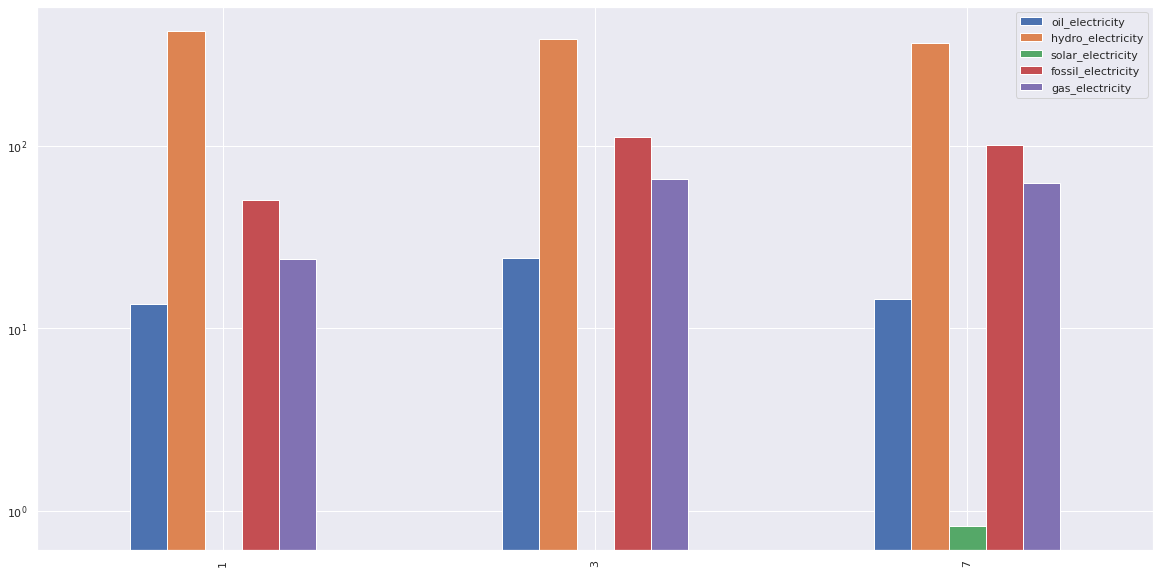

In [105]:
# nesta etapa são convertidos todos os valores do gráfico para float e plotamos o gráfico para melhor visualização do gráfico
treino = treino.astype({"oil_electricity": float, "hydro_electricity": float, "fossil_electricity": float, "gas_electricity": float, "PIB": float})
treino1 = treino.drop(['year', 'country','target'], axis=1)
treino2 = treino1.drop(['PIB', 'new_target'], axis = 1)
treino2.plot(kind='bar', logy=True)

In [106]:
treino1 - treino1.diff()

,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,PIB,new_target
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.60,424.05,0.0,50.27,24.06,2.616157e+14,1.0
7,24.43,387.08,0.0,111.84,66.05,2.472819e+14,1.0


In [107]:
treino1 = treino1.sum()
treino1 

oil_electricity       5.254000e+01
hydro_electricity     1.178330e+03
solar_electricity     8.300000e-01
fossil_electricity    2.638300e+02
gas_electricity       1.527200e+02
PIB                   7.152491e+14
new_target            3.000000e+00
dtype: float64

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
def prepare(df):
  return df.drop(['country', 'year'], axis=1)

#Função de Normalização
def normalize(df):
  df_temp = df.copy()
  X = prepare(df_temp)
  return scaler.fit_transform(X)


In [109]:
df_pib2 = treino.copy() 
df_pib2

,year,oil_electricity,hydro_electricity,solar_electricity,fossil_electricity,gas_electricity,country,PIB,target,new_target
1,2011,13.60,424.05,0.00,50.27,24.06,Brazil,2.616157e+14,0.0,1.0
3,2013,24.43,387.08,0.00,111.84,66.05,Brazil,2.472819e+14,0.0,1.0
7,2017,14.51,367.20,0.83,101.72,62.61,Brazil,2.063515e+14,0.0,1.0


In [110]:
df_temp = df_pib2.copy()
X = prepare(df_temp)
df_temp = scaler.fit_transform(X)
df_temp

array([[-0.79783976,  1.3276229 , -0.70710678, -1.39750623, -1.41035947,
         0.99073501,  0.        ,  0.        ],
       [ 1.4101512 , -0.24183623, -0.70710678,  0.88645569,  0.795538  ,
         0.37860795,  0.        ,  0.        ],
       [-0.61231144, -1.08578666,  1.41421356,  0.51105054,  0.61482147,
        -1.36934296,  0.        ,  0.        ]])

In [111]:
treino = treino.corr(method='pearson')
treino = treino.drop(['year',	'oil_electricity'	,'hydro_electricity'	,'solar_electricity',	'fossil_electricity',	'gas_electricity','target', 'new_target'], axis=1)
treino

,PIB
year,-0.996730
oil_electricity,0.193970
hydro_electricity,0.903525
solar_electricity,-0.968272
fossil_electricity,-0.582914
gas_electricity,-0.645999
PIB,1.000000
target,NaN
new_target,NaN
